In [15]:
import numpy as np
import matplotlib.pyplot as plt


def load_data(path='mnist.npz'): 
    with np.load(path, allow_pickle=True) as f:  # pylint: disable=unexpected-keyword-arg
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']

    return (x_train, y_train), (x_test, y_test)

In [16]:
# файл может быть скачан по ссылке https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


label is 7


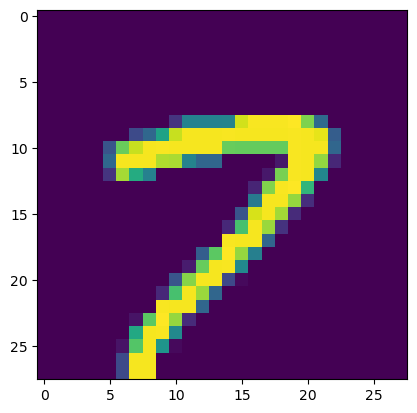

In [17]:
index = 123

print('label is %d' % y_train[index])
plt.imshow(x_train[index])
plt.show()

In [79]:
class MyFirstClassifier(object):
    def __init__(self):
        pass
    def fit(self, x_train, y_train):
        self.class_means = {}
        for digit in np.unique(y_train):
            digit_pixels = x_train[y_train == digit]
            mean_pixel = np.mean(digit_pixels, axis=0)
            self.class_means[digit] = mean_pixel
    def predict(self, x_test):
        predictions = []
        for image in x_test:
            min_distance = float('inf')
            predicted_digit = None
            for digit, mean_pixel in self.class_means.items():
                distance = np.sum(np.abs(image - mean_pixel))
                if distance < min_distance:
                    min_distance = distance
                    predicted_digit = digit
            predictions.append(predicted_digit)
        return predictions

def accuracy_score(pred, gt):
    return np.mean(pred==gt)

In [80]:
cls = MyFirstClassifier()
cls.fit(x_train, y_train)
pred = cls.predict(x_test)

print('accuracy is %.4f' % accuracy_score(pred, y_test))

accuracy is 0.6685


#### Задача

Реализовать собственный классификатор с точностью не менее 20%